## Linear Transformations

In [1]:
import laguide as lag
import numpy as np
import scipy.linalg as sla
%matplotlib inline
import matplotlib.pyplot as plt
from math import pi, sin, cos

**Exercise 1:** Find the vector $T(V)$ where

$$
\begin{equation}
V = \left[\begin{array}{r} 1 \\ 3 \end{array} \right]
\end{equation}
$$

We use the definition of $T$ to find $T(V)$ and then check our answer by using the $\texttt{T}$ function that we defined.

$$
\begin{equation}
T(V) = T \left(\left[ \begin{array}{rr} 1 \\ 3 \end{array}\right]\right)
= \left[ \begin{array}{rr} 2(1) \\ 0 \\ (3) \end{array}\right]
= \left[ \begin{array}{rr} 2 \\ 0 \\ 3 \end{array}\right]
\end{equation}
$$

In [2]:
def T(V):
    W = np.zeros((3,1))
    W[0,0] = 2*V[0,0]
    W[2,0] = V[1,0]
    return W

V = np.array([[1],[3]])
print(T(V))

[[2.]
 [0.]
 [3.]]


**Exercise 2:** Find the vector $U$ so that 

$$
\begin{equation}
T(U) = \left[\begin{array}{r} 5 \\ 0 \\ -1 \end{array} \right]
\end{equation}
$$

If we start by taking $U$ to be an arbitrary vector in $\mathbb{R}^2$ with entries $u_1$ and $u_2$, then we get the following vector equation for $U$.

$$
\begin{equation}
T(U) = T \left(\left[\begin{array}{r} u_1 \\ u_2 \end{array} \right]\right)
= \left[\begin{array}{r} 2u_1 \\ 0 \\ u_2 \end{array} \right]
= \left[\begin{array}{r} 5 \\ 0 \\ -1 \end{array} \right]
\end{equation}
$$

We can see that $2u_1 = 5$ so $u_1 = 2.5$ and $u_2 = -1$. Therefore $U = \left[\begin{array}{r} 2.5 \\ -1 \end{array} \right]$

**Exercise 3:** Write a Python function that implements the transformation $N:\mathbb{R}^3\to\mathbb{R}^2$, given by the following rule.  Use the function to find evidence that $N$ is **not linear**.

$$
\begin{equation}
N \left(\left[\begin{array}{r} v_1 \\ v_2 \\ v_3 \end{array} \right]\right) = 
\left[\begin{array}{c} 8v_2 \\  v_1 + v_2 + 3 \end{array} \right]
\end{equation}
$$

In [3]:
def N(V):
    W = np.zeros((2,1))
    W[0,0] = 8*V[1,0]
    W[1,0] = V[0,0] + V[1,0] + 3
    return W

One of the requirements for $N$ to be linear is that $N(V+W) = N(V) + N(W)$ for all vectors $V,W$ in $\mathbb{R}^3$. Any choice of $V$ and $W$ shows that this is not the case, however, and so $N$ is not linear.

In [4]:
V = np.array([[1],[1],[1]])
W = np.array([[1],[2],[3]])
print(N(V + W),'\n')
print(N(V) + N(W))

[[24.]
 [ 8.]] 

[[24.]
 [11.]]


**Exercise 4:** Consider the two transformations, $S$ and $R$, defined below.  Write a Python function that implements the composition $R\circ S$.  Explain why it is not possible to form the composition $S \circ R$.

$$
\begin{equation}
S \left(\left[\begin{array}{r} v_1 \\ v_2 \\ v_3 \end{array} \right]\right) = 
\left[\begin{array}{c}   v_1 + v_2 \\  3v_3 \end{array} \right]
\end{equation}
$$

$$
\begin{equation}
R \left(\left[\begin{array}{r} v_1 \\ v_2  \end{array} \right]\right) = 
\left[\begin{array}{rr} 3 &  0 \\ -1 & 1 \end{array}\right]
\left[\begin{array}{c}   v_1 \\ v_2 \end{array} \right]
\end{equation}
$$
  

We will first write a function for each of $S$ and $R$, and then we will write a function that implements the composition $R \circ S$ by first applying $S$ and then applying $R$ to the output of that transformation. We will confirm that it is working correctly by testing with an example vector.

In [5]:
def S(V):
    W = np.zeros((2,1))
    W[0,0] = V[0,0] + V[1,0]
    W[1,0] = 3*V[2,0]
    return W

def R(V):
    T = np.array([[3,0],[-1,1]])
    W = T@V
    return W

def R_composed_with_S(V):
    W = R(S(V))
    return W

V = np.array([[1],[4],[-2]])
print(R_composed_with_S(V))

[[ 15.]
 [-11.]]


$$
\begin{equation}
R \left(S\left(\left[\begin{array}{r} 1 \\ 4 \\ -2 \end{array} \right]\right)\right) 
= R \left(\left[\begin{array}{r} 5 \\ -6 \end{array} \right]\right)
= \left[\begin{array}{r} 3 & 0 \\ -1 & 1 \end{array} \right] \left[\begin{array}{r} 5 \\ -6 \end{array} \right]
= \left[\begin{array}{r} 15 \\ -11 \end{array} \right]
\end{equation}
$$

It is impossible to form the composition $S \circ R$ because this requires applying the transformation $S$ to the output of the mapping $R$, but $R$ outputs vectors in $\mathbb{R}^2$ and $S$ needs input vectors from $\mathbb{R}^3$.

**Exercise 5:** Create a Python function which implements the transformation: $S:\mathbb{R}^3\to\mathbb{R}^3$, given below. Use the function to provide evidence whether the transformation is **linear** or not.


$$
\begin{equation}
S \left(\left[\begin{array}{r} v_1 \\ v_2 \\ v_3 \end{array} \right]\right) = 
\left[\begin{array}{c} v_1 + v_2 \\  1 \\ v_3+v_1 \end{array} \right]
\end{equation}
$$

Repeat for the transformation $T:\mathbb{R}^3\to\mathbb{R}^3$ is now defined by

$$
\begin{equation}
T \left(\left[\begin{array}{r} v_1 \\ v_2 \\ v_3 \end{array} \right]\right) = 
\left[\begin{array}{c} v_1 + v_2 \\  0 \\ v_3+v_1 \end{array} \right].
\end{equation}
$$

#### Solution:

In [6]:
def S(V):
    W = np.zeros((3,1))
    W[0,0] = V[0,0] + V[1,0]
    W[1,0] = 1
    W[2,0] = V[1,0] +V[2,0]
    return W

V = np.array([[1],[2],[3]])
W = np.array([[2],[1],[3]])

print("V: \n", V, '\n')
print("S(V): \n", S(V), '\n')
print("S(W): \n", S(W), '\n')
print("S(V+W): \n", S(V+W), '\n')
print("S(V)+S(W): \n", S(V)+S(W), '\n')

V: 
 [[1]
 [2]
 [3]] 

S(V): 
 [[3.]
 [1.]
 [5.]] 

S(W): 
 [[3.]
 [1.]
 [4.]] 

S(V+W): 
 [[6.]
 [1.]
 [9.]] 

S(V)+S(W): 
 [[6.]
 [2.]
 [9.]] 



We see that $S(V+W)\neq S(V) + S(W)$. Therefore, the transformation $S:\mathbb{R}^3\to\mathbb{R}^3$ is not linear.

Now, let us consider that the transformation $T:\mathbb{R}^3\to\mathbb{R}^3$ is defined as: 
$$
\begin{equation}
T \left(\left[\begin{array}{r} v_1 \\ v_2 \\ v_3 \end{array} \right]\right) = 
\left[\begin{array}{c} v_1 + v_2 \\  0 \\ v_3+v_1 \end{array} \right]
\end{equation}
$$

It only differs from the previous transformation in terms of the second entry which is zero in this case rather than 1. Let us define the corresponding python function in the code cell below:


In [7]:
def T(V):
    U = np.zeros((3,1))
    U[0,0] = V[0,0] + V[1,0]
    U[1,0] = 0
    U[2,0] = V[1,0] + V[2,0]
    return U

V = np.array([[1],[2],[3]])
W = np.array([[2],[4],[1]])

print("V: \n", V, '\n')
print("T(V): \n", T(V), '\n')
print("T(W): \n", T(W), '\n')
print("T(V+W): \n", T(V+W), '\n')
print("T(V)+T(W): \n", T(V)+T(W), '\n')

k = 5
print("T(kV)): \n", T(k*V), '\n')
print("kT(V)): \n", k*T(V), '\n')

V: 
 [[1]
 [2]
 [3]] 

T(V): 
 [[3.]
 [0.]
 [5.]] 

T(W): 
 [[6.]
 [0.]
 [5.]] 

T(V+W): 
 [[ 9.]
 [ 0.]
 [10.]] 

T(V)+T(W): 
 [[ 9.]
 [ 0.]
 [10.]] 

T(kV)): 
 [[15.]
 [ 0.]
 [25.]] 

kT(V)): 
 [[15.]
 [ 0.]
 [25.]] 



Our conclusions differ from that in the previous case. In this case, $T(V+W) = T(V) + T(W)$ and $T(kV) = kT(V)$. Therefore, we have evidence that $T:\mathbb{R}^3\to\mathbb{R}^3$ is a linear transformation.

Note the difference between $S$ and $T$ in this exercise.

**Exercise 6:** $L:\mathbb{R}^3\to\mathbb{R}^2$ is a **Linear Transformation** . Find $L(kU+V)$ given that $k=7$, 

$$
\begin{equation}
L(U) = \left[\begin{array}{r} 1 \\ 1  \end{array} \right]\hspace{1cm}
L(V) = \left[\begin{array}{r} 3 \\ 1  \end{array} \right]
\end{equation}
$$

#### Solution:

Since $L:\mathbb{R}^3\to\mathbb{R}^2$ is a linear transformation, we can say that $L(kU+V) = L(kU) + L(V)$. Then, we can write $L(kV) = kL(V)$. Therefore, $L(kU+V) = kL(U)+ L(V)$.

Given $k$, $L(V)$ and $L(U)$, we can find $L(kU+V)$.

$$
\begin{equation}
L(kU+V) = (7)\left[\begin{array}{r} 1 \\ 1  \end{array} \right] + 
\left[\begin{array}{r} 3 \\ 1  \end{array} \right] = 
\left[\begin{array}{r} 10 \\ 8  \end{array} \right]
\end{equation}
$$

**Exercise 7:** Let $T:\mathbb{R}^3 \to \mathbb{R}^2$ be defined by $T(X)= AX$, where 

$$
\begin{equation}
A = \left[\begin{array}{rrr} 1 & 0 & 2 \\ 2 & 1 & 1  \end{array}\right].
\end{equation}
$$

Find all vectors $X$ that satisfy $T(X) = \left[\begin{array}{r} 1 \\ 2  \end{array} \right]
$. 


#### Solution:

Given $T(X)$ and $A$, we can find $X$ by solving the following system:

$$
\begin{equation}
AX = \left[ \begin{array}{rrr} 1 & 0 & 2 \\ 2 & 1 & 1\end{array}\right]
\left[ \begin{array}{r} x_1 \\ x_2 \\ x_3  \end{array}\right]=
\left[ \begin{array}{r}1 \\ 2  \end{array}\right]= T(X)
\end{equation}
$$

We can see that there is no pivot in the third column of the coefficient matrix $A$, this means that $x_3$ is a free variable. Therefore, the above system has infinitely many solutions. In other words, there are an infinite number of vectors $X$ in $\mathbb{R}^3$ which get mapped to the vector $AX$ in space $\mathbb{R}^2$.



For instance, when $x_3 = 3$, then we get $x_1 = -5$ and $x_2 = 9$.
So, $$
\begin{equation}
X = \left[ \begin{array}{rrr} -5 \\ 9 \\ 3 \end{array}\right]
\end{equation}
$$


In [8]:
## verifying that T(X) = AX:

A = np.array([[1,0,2],[2,1,1]])
X = np.array([[-5],[9],[3]])

print("AX: \n", A@X, '\n')

# Verifying that X is not unique:
# When x_3 = 0, x_2 = 0, x_1 = 1

X_2 = np.array([[1],[0],[0]])
print("AX_2: \n", A@X_2, '\n')

AX: 
 [[1]
 [2]] 

AX_2: 
 [[1]
 [2]] 



The computation demonstrates that $T(X)$ is same for two different vectors $X$. Therefore, $X$ is not unique.

**Exercise 8:** Let $M:\mathbb{P}_1 \to \mathbb{P}_3$ be a transformation defined by $M(p(x)) = x^3 + p(x)$. Determine whether $M$ is linear or not. 

#### Solution:

In order to determine whether $M$ is linear or not, let us consider two polynomials $p(x)$ and $q(x)$ in $\mathbb{P}_1$. 

$M((p + q)(x)) = x^3 + p(x) + q(x)$ by the general properties of polynomials.

$M(p(x)) + M(q(x)) = (x^3 + p(x)) + (x^3 + q(x)) = 2x^3 + p(x) + q(x)$.

We can see that $M((p + q)(x))$ is not the same as $M(p(x)) + M(q(x))$. Therefore, $M$ is not linear.

We can also see what $M(kp(x))$ and $k(M(p(x)))$ look like.

$M(kp(x)) = x^3 + kp(x)$

$k(M(p(x))) = kx^3 + kp(x)$

It is clear that $M(kp(x))$ and $k(M(p(x)))$ are also different.

**Exercise 9:** Let $S:\mathbb{P}_2 \to \mathbb{P}_3$ and $T:\mathbb{P}_3 \to \mathbb{P}_5$ be two **linear transformations** defined by the rules given below. Define the composition $T\circ S$ and determine whether it is linear or not. Explain why $S\circ T$ is not defined.

$S(p(x)) = x(p(x))$ 

$T(q(x)) = x^2(q(x))$ 

where $p(x)$ is a polynomial in $\mathbb{P}_2$ and $q(x)$ is a polynomial in $\mathbb{P}_3$. 

#### Solution:

Since $S:\mathbb{P}_2 \to \mathbb{P}_3$ and $T:\mathbb{P}_3 \to \mathbb{P}_5$ are two **linear transformations**, $T\circ S:\mathbb{P}_2 \to \mathbb{P}_5$ and it is defined by the following rule:

$T\circ S = T(S(p(x))) = x^2(S(p(x)))$ 

$S(p(x)) = x(p(x))$. Therefore, $T\circ S = T(S(p(x))) = x^2(xp(x))$ 

$T\circ S = T(S(p(x))) = x^3(p(x))$

So, $T\circ S:\mathbb{P}_2 \to \mathbb{P}_5$ is a transformation defined by the following rule:

$T\circ S = T(S(p(x))) = x^3(p(x))$

Let us see if  $T\circ S:\mathbb{P}_2 \to \mathbb{P}_5$ is a linear transformation.
Consider two polynomials $p(x)$ and $q(x)$ in $\mathbb{P}_2$.

$T(S(p(x) + q(x))) = x^3(p(x) + q(x)) = x^3(p(x)) + x^3(q(x)) $ by the properties of polynomials.

$T(S(p(x))) + T(S(q(x))) = x^3(p(x)) + x^3(q(x)) $.

$T(S(kp(x))) = x^3(kp(x)) = kx^3(p(x)))$ by the properties of polynomials.

$kT(S(p(x))) = x^3(kp(x)) = kx^3(p(x)))$

$T\circ S $ is a linear transformation since $T(S(p(x) + q(x))) =T(S(p(x))) + T(S(q(x)))$ and $T(S(kp(x))) = kT(S(p(x)))$.



$S\circ T$ is not defined because the output space of $T$ is not the input space of $S$. The output space of $T$ is $\mathbb{P}_5$ but the input space of $S$ is $\mathbb{P}_2$.

### Matrix Representations

**Exercise 1:** For each of the following linear transformations, find the standard matrix representation, and then determine if the transformation is onto, one-to-one, or invertible.

$(a)$

$$
\begin{equation}
B \left(\left[\begin{array}{r} x_1 \\ x_2 \\ x_3 \\ x_4 \end{array} \right]\right) = 
\left[\begin{array}{c} x_1 + 2x_2 - x_3 -x_4 \\ x_2 -3x_3 +2x_4 \end{array} \right]
\end{equation}
$$

$B$ maps $\mathbb{R}^4$ to $\mathbb{R}^2$ so to find the standard matrix representation of $B$, we have to first apply the formula to each of the four standard basis vectors of $\mathbb{R}^4$.

$$
\begin{equation}
B\left(\left[\begin{array}{r} 1\\0\\0\\0 \end{array}\right]\right)= \left[\begin{array}{r} 1\\0 \end{array}\right] \hspace{1cm} 
B\left(\left[\begin{array}{r} 0\\1\\0\\0 \end{array}\right]\right)= \left[\begin{array}{r} 2\\1 \end{array}\right] \hspace{1cm} 
B\left(\left[\begin{array}{r} 0\\0\\1\\0 \end{array}\right]\right)= \left[\begin{array}{r} -1\\-3 \end{array}\right] \hspace{1cm}
B\left(\left[\begin{array}{r} 0\\0\\0\\1 \end{array}\right]\right)= \left[\begin{array}{r} -1\\2 \end{array}\right] 
\end{equation}
$$

We build $[B]$ by using these images as the columns and then find the RREF using $\texttt{FullRowReduction}$.

$$
\begin{equation}
[B] = \left[\begin{array}{rr} 1 & 2 & -1 & -1 \\ 0 & 1 & -3 & 2 \end{array}\right]
\end{equation}
$$

In [9]:
B = np.array([[1,2,-1,-1],[0,1,-3,2]])
print(lag.FullRowReduction(B))

[[ 1.  0.  5. -5.]
 [ 0.  1. -3.  2.]]


The RREF of $[B]$ has a pivot in every row, but not in the third and fourth columns. Therefore $B$ is onto but not one-to-one.

$(b)$

$$
\begin{equation}
C \left(\left[\begin{array}{r} x_1 \\ x_2 \\ x_3 \end{array} \right]\right) = 
\left[\begin{array}{c} x_1 -x_2 + 8x_3 \\ 4x_1 + 5x_2 - x_3 \\ -x_1 -x_2 + 3x_3 \end{array} \right]
\end{equation}
$$

$C$ maps $\mathbb{R}^3$ to $\mathbb{R}^3$ so to find the standard matrix representation of $C$, we have to first apply the formula to each of the three standard basis vectors of $\mathbb{R}^3$.

$$
\begin{equation}
C\left(\left[\begin{array}{r} 1\\0\\0 \end{array}\right]\right)= \left[\begin{array}{r} 1\\4\\-1 \end{array}\right]\hspace{1cm} 
C\left(\left[\begin{array}{r} 0\\1\\0 \end{array}\right]\right)= \left[\begin{array}{r} -1\\5\\-1 \end{array}\right]\hspace{1cm} 
C\left(\left[\begin{array}{r} 0\\0\\1 \end{array}\right]\right)= \left[\begin{array}{r} 8\\-1\\3 \end{array}\right]
\end{equation}
$$

We build $[C]$ by using these images as the columns and then find the RREF using $\texttt{FullRowReduction}$.

$$
\begin{equation}
[C] = \left[\begin{array}{rr} 1 & -1 & 8 \\ 4 & 5 & -1 \\ -1 & -1 & 3\end{array}\right]
\end{equation}
$$

In [10]:
C = np.array([[1,-1,8],[4,5,-1],[-1,-1,3]])
print(lag.FullRowReduction(C))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


The RREF of $[C]$ has a pivot in every row and column. Therefore $C$ is onto and one-to-one, which means it is invertible.

**Exercise 2:** Let $L:\mathbb{R}^3 \to \mathbb{R}^2$ be the **linear transformation** defined by $L(X)= AX$. 

$$
\begin{equation}
A = \left[\begin{array}{rrr} 1 & 1 & 1\\ 2 & 3 & 4  \end{array}\right]\
\end{equation}
$$

Determine whether $L:\mathbb{R}^3 \to \mathbb{R}^2$ is an invertible transformation or not.



#### Solution:

The **linear transformation** $L:\mathbb{R}^3 \to \mathbb{R}^2$ will be invertible if the matrix $A$ is invertible as $L(X)= AX$. Since $A$ is a $ 2 \times 3 $ matrix, it cannot be invertible. Therefore, $L:\mathbb{R}^3 \to \mathbb{R}^2$ is not an invertible transformation.

**Exercise 3:** $L:\mathbb{R}^3\to\mathbb{R}^2$ is a **Linear Transformation**. Find $L(X)$ given the following vectors.


$$
\begin{equation}
L\left(\left[\begin{array}{r} 1\\0\\0 \end{array}\right]\right)= \left[\begin{array}{r} 2\\0 \end{array}\right] \hspace{1cm}  
L\left(\left[\begin{array}{r} 0\\1\\0 \end{array}\right]\right)= \left[\begin{array}{r} 1\\3 \end{array}\right] \hspace{1cm}  
L\left(\left[\begin{array}{r} 0\\0\\1 \end{array}\right]\right)= \left[\begin{array}{r} 1\\2 \end{array}\right] \hspace{1cm}
X = \left[\begin{array}{r} 4\\5\\3 \end{array}\right]
\end{equation}
$$



#### Solution:

The standard matrix representation of $L$ is built using the images of bases vectors as columns.


$$
\begin{equation}
\left[L\right] =\left[\begin{array}{rr} 2 & 1 & 1 \\ 0 & 3 & 2 \end{array}\right]  
\end{equation}
$$

Now $L(X) = [L]X$.


$$
\begin{equation}
L(X) = \left[L\right]X =\left[\begin{array}{rr} 2 & 1 & 1 \\ 0 & 3 & 2 \end{array}\right] \left[\begin{array}{r} 4 \\ 5 \\3 \end{array}\right] = 
\left[\begin{array}{r} 16\\ 21\end{array}\right]
\end{equation}
$$


**Exercise 4:** The standard matrix representation of a **linear transformation** $S$ is given below. Determine the input and output space of $S$ by looking at the dimensions of $\left[S\right]$. Determine whether $S$ is an invertible transformation.


$$
\begin{equation}
\left[S\right] =\left[\begin{array}{rr} 2 & 0 & 3 & 8\\ 0 & 1 & 9 & 4 \end{array}\right]  
\end{equation}
$$

#### Solution:

The linear transformation is defined by $S(X)=[S]X$.  Since $[S]$ is a $2 \times 4 $ matrix, the matrix-vector product $S(X)=[S]X$ is defined only if $X$ is in $\mathbb{R}^4$.  The input space is thus $\mathbb{R}^4$.  Since the product $[S]X$ is in $\mathbb{R}^2$, the output space is $\mathbb{R}^2$.

The transformation $S:\mathbb{R}^4\to\mathbb{R}^2$ will be invertible only if $[S]$ is an invertible matrix. Since $[S]$ is a $ 2 \times 4$ matrix it cannot be invertible, which means that $S$ is not an invertible linear transformation.

**Exercise 5:** The **linear transformation** $W:\mathbb{R}^3\to\mathbb{R}^3$ is an invertible transformation. Find $X$.


$$
\begin{equation}
\left[W\right] =\left[\begin{array}{rr} 1 & 1 & 0\\ 1 & 2 & 2 \\ 2 & 1 & 3 \end{array}\right] \hspace{1cm}
W(X) = \left[\begin{array}{r} 3 \\ 11 \\ 13 \end{array}\right]
\end{equation}
$$

#### Solution:

We know that $W(X) = [W]X$, so we must solve a linear system to determin $X$.

In [11]:
## builiding the matrix [W] and W(X):
W = np.array([[1,1,0],[1,2,2],[2,1,3]])
W_X = np.array([[3],[11],[13]])

X = lag.SolveSystem(W,W_X)

print("X: \n", X)

X: 
 [[1.]
 [2.]
 [3.]]


**Exercise 6:** Let $T:\mathbb{R}^3\to\mathbb{R}^3$ be a **linear transformation**. Given that there are two vectors in $\mathbb{R}^3$ which get mapped to the same vector in $\mathbb{R}^3$, what can you say about the number of solutions for  $[T]X=B$ ?  Explain why $T$ is not an invertible transformation.

#### Solution:

If there are two vectors which get mapped by $T$ to the same vector in $\mathbb{R}^3$, it means that $T$ is not not one-to-one. This implies that the standard matrix representation $[T]$ contains at least one column which does not have a pivot.  This implies that there is a free variable in the system $[T]X = B$, which implies that the system has infinitely many solutions.

Since $T$ is not one-to-one, it cannot be invertible.  If $T(U) = B$ and $T(W)=B$, then $T^{-1}(B)$ is not well-defined.  In other words, there is not a unique solution to the system $[T]X=B$.

### Transformations in a Plane

**Exercise 1:** 

($a$) Find a matrix that represents the reflection about the $x_1$-axis. 

In [12]:
## Code solution here.

($b$) Multiply the matrix by $\texttt{coords}$ and plot the results.

In [13]:
## Code solution here.

**Exercise 2:** 

($a$) Find a matrix that represents the reflection about the line $x_1=x_2$. 

In [14]:
## Code solution here.

($b$) Multiply the matrix by $\texttt{coords}$ and plot the results.

In [15]:
## Code solution here.

**Exercise 3:** 

($a$) Find a matrix that represents the rotation clockwise by an angle $\theta$. 

In [16]:
## Code solution here.

($b$) Let $\theta = 90^{\circ}$.  Multiply the matrix by $\texttt{coords}$ and plot the results.

In [17]:
## Code solution here.

**Exercise 4:** 

$(a)$ Find a matrix that represents a vertical shear followed by the rotation in Example 3. 

If we take $k = 3$ as our vertical shearing factor then the matrix that represents this vertical shear followed by the rotation in Example 3 is the following

$$
\begin{equation}
\left[\begin{array}{rr} \cos(\frac{\pi}{6}) & -\sin(\frac{\pi}{6}) \\ \sin(\frac{\pi}{6}) & \cos(\frac{\pi}{6}) \end{array}\right] \left[\begin{array}{rr} 1 & 0 \\ 3 & 1\end{array}\right]
= \left[\begin{array}{rr} \cos(\frac{\pi}{6}) - 3\sin(\frac{\pi}{6}) & -\sin(\frac{\pi}{6}) \\ \sin(\frac{\pi}{6}) + 3\cos(\frac{\pi}{6}) & \cos(\frac{\pi}{6}) \end{array}\right]
= \left[\begin{array}{rr} \frac{-3 + \sqrt{3}}{2} & -\frac{1}{2} \\ \frac{1 + 3\sqrt{3}}{2} & \frac{\sqrt{3}}{2}\end{array}\right]
\end{equation}
$$

In [18]:
R = np.array([[cos(pi/6),-sin(pi/6)],[sin(pi/6),cos(pi/6)]])
S = np.array([[1,0],[3,1]])
RS = R@S
print(RS)

[[-0.6339746  -0.5       ]
 [ 3.09807621  0.8660254 ]]


$(b)$ Multiply the matrix by $\texttt{coords}$ and plot the results.

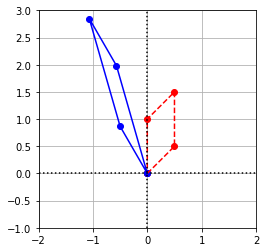

In [19]:
coords = np.array([[0,0],[0.5,0.5],[0.5,1.5],[0,1],[0,0]])
coords = coords.transpose()
x = coords[0,:]
y = coords[1,:]
RS_coords = RS@coords

x_LT1 = RS_coords[0,:]
y_LT1 = RS_coords[1,:]

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the points.  x and y are original vectors, x_LT1 and y_LT1 are images
ax.plot(x,y,'ro')
ax.plot(x_LT1,y_LT1,'bo')

# Connect the points by lines
ax.plot(x,y,'r',ls="--")
ax.plot(x_LT1,y_LT1,'b')

# Edit some settings 
ax.axvline(x=0,color="k",ls=":")
ax.axhline(y=0,color="k",ls=":")
ax.grid(True)
ax.axis([-2,2,-1,3])
ax.set_aspect('equal')

**Exercise 5:** Create a new matrix of coordinates and apply one of the transformations in the Examples.  Plot the results.

As an example, we use the following matrix of coordinates and the matrix $A$ that causes a horizontal stretch.

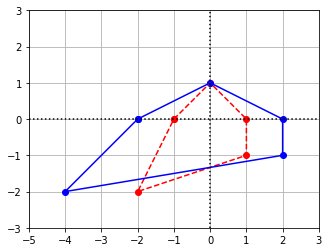

In [20]:
coords = np.array([[-1,0],[0,1],[1,0],[1,-1],[-2,-2],[-1,0]])
coords = coords.transpose()
x = coords[0,:]
y = coords[1,:]
A = np.array([[2,0],[0,1]])
A_coords = A@coords

x_LT1 = A_coords[0,:]
y_LT1 = A_coords[1,:]

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the points.  x and y are original vectors, x_LT1 and y_LT1 are images
ax.plot(x,y,'ro')
ax.plot(x_LT1,y_LT1,'bo')

# Connect the points by lines
ax.plot(x,y,'r',ls="--")
ax.plot(x_LT1,y_LT1,'b')

# Edit some settings 
ax.axvline(x=0,color="k",ls=":")
ax.axhline(y=0,color="k",ls=":")
ax.grid(True)
ax.axis([-5,3,-3,3])
ax.set_aspect('equal')

**Exercise 6:** 

($a$) Construct a matrix that represents a horizontal and a vertical stretch by a factor of 2 . 

In [21]:
## Code solution here

($b$) Create a new matrix of coordinates.  Apply this transformation and plot the results.

In [22]:
## Code solution here

### Applications

#### Computer Graphics

**Exercise 1:** 

$(a)$ Find a single matrix that represents a transformation that has the effect of a reflection about the line $x_1=x_2$ followed by a shift four units to the left. 

We will find matrices that do each part seperately then compose them to get a single matrix that does everything. Since a translation four units to the left cannot be expressed using a $2 \times 2$ matrix, we will need to use the same trick as before and view $\mathbb{R}^2$ as a plane embedded in $\mathbb{R}^3$. If we associate the coordinates $(x_1,x_2)$ of a point in $\mathbb{R}^2$ with the coordinates $(x_1,x_2,1)$ of a point in $\mathbb{R}^3$ and define the matrix $L$ below, then multiplying any vector in the plane $x_3 = 1$ with $L$ shears the vector parallel to the $x_1x_2$-plane, in the direction of the desired translation.

$$
\begin{equation}
L = \left[\begin{array}{rr} 1 & 0 & -4 \\ 0 & 1 & 0 \\ 0 & 0 & 1  \end{array}\right]
\end{equation}
$$

Reflecting about the line $x_1 = x_2$ is equivalent to first rotating by $\frac{\pi}{4}$ (since the line $x_1 = x_2$ is $\frac{\pi}{4}$ off from the vertical axis), reflecting over the vertical axis, then rotating back by $-\frac{\pi}{4}$. This can be represented by the following composition.

$$
\begin{equation}
\left[\begin{array}{rr} \cos(\frac{\pi}{4}) & -\sin(\frac{\pi}{4}) \\ \sin(\frac{\pi}{4}) & \cos(\frac{\pi}{4}) \end{array}\right] 
\left[\begin{array}{rr} 1 & 0 \\ 0 & -1\end{array}\right]
\left[\begin{array}{rr} \cos(-\frac{\pi}{4}) & -\sin(-\frac{\pi}{4}) \\ \sin(-\frac{\pi}{4}) & \cos(-\frac{\pi}{4}) \end{array}\right]
= \left[\begin{array}{rr} 0 & 1 \\ 1 & 0\end{array}\right]
\end{equation}
$$

Since we want to compose these transformations, we need to find a way of interpreting the reflection as acting on vectors in the plane $\mathbb{R}^2$ embedded in $\mathbb{R}^3$. We can do this in exactly the same way as above and we get that the appropriate matrix that represents a reflextion about the line $x_1 = x_2$ in the plane $x_3 = 1$ is the following matrix $R$.

$$
\begin{equation}
R = \left[\begin{array}{rr} 0 & 1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 1 \end{array}\right]
\end{equation}
$$

Composing these two to get our final matrix gives us the following matrix.

$$
\begin{equation}
LR = \left[\begin{array}{rr} 1 & 0 & -4 \\ 0 & 1 & 0 \\ 0 & 0 & 1  \end{array}\right]
\left[\begin{array}{rr} 0 & 1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 1 \end{array}\right]
= \left[\begin{array}{rr} 0 & 1 & -4 \\ 1 & 0 & 0 \\ 0 & 0 & 1 \end{array}\right]
\end{equation}
$$

$(b)$ Apply the transformation to the shape defined by $\texttt{coords}$ and plot the results.

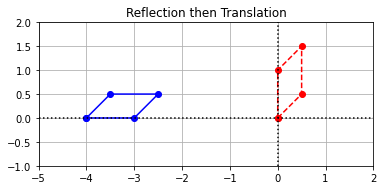

In [23]:
coords = np.array([[0,0],[0.5,0.5],[0.5,1.5],[0,1],[0,0]])
coords = coords.transpose()
x = coords[0,:]
y = coords[1,:]

# Form a matrix of coordinates with rows x, y, 1
Ones = np.ones((1,5))
coords = np.vstack((x,y,Ones))

# Define the matrix for the transfomation LR
LR = np.array([[0,1,-4],[1,0,0],[0,0,1]])

## Compute the transformation by matrix multiplication
coords_transformed = LR@coords

## Slice off the first and second rows.  These are the coords of the transformed points
x_transformed = coords_transformed[0,:]
y_transformed = coords_transformed[1,:]

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the points.
ax.plot(x,y,'ro')
ax.plot(x_transformed,y_transformed,'bo')

# Connect the points by lines
ax.plot(x,y,'r',ls="--")
ax.plot(x_transformed,y_transformed,'b')

# Edit some settings 
ax.axvline(x=0,color="k",ls=":")
ax.axhline(y=0,color="k",ls=":")
ax.grid(True)
ax.axis([-5,2,-1,2])
ax.set_aspect('equal')
ax.set_title("Reflection then Translation");

**Exercise 2:**  

$(a)$ Find a single matrix that represents a rotation about the point $(1,2)$.  (*Hint:  Make use of a translation to bring the center of rotation to $(0,0)$*.)

Rotating about the point $(1,2)$ is equivalent to translating one unit to the left and two units down, performing the desired rotation, and then translating back one unit to the right and two units up. Since a translation cannot be expressed using a $2 \times 2$ matrix, we will need to use the same trick as before and view $\mathbb{R}^2$ as a plane embedded in $\mathbb{R}^3$. If we associate the coordinates $(x_1,x_2)$ of a point in $\mathbb{R}^2$ with the coordinates $(x_1,x_2,1)$ of a point in $\mathbb{R}^3$ and define the matrices $L$ and $R$ below, then multiplying any vector in the plane $x_3 = 1$ with $L$ translates it one unit left and two units down, while multiplying by $R$ translates it back.

$$
\begin{equation}
L = \left[\begin{array}{rr} 1 & 0 & -1 \\ 0 & 1 & -2 \\ 0 & 0 & 1  \end{array}\right] \hspace{1cm}
R = \left[\begin{array}{rr} 1 & 0 & 1 \\ 0 & 1 & 2 \\ 0 & 0 & 1  \end{array}\right]
\end{equation}
$$

We know that to rotate a vector by an angle $\theta$ we must multiply by the matrix below.

$$
\begin{equation}
\left[ \begin{array}{cc} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{array}\right]
\end{equation}
$$

Since we want to compose these transformations, we need to find a way of interpreting the rotation as acting on vectors in the plane $\mathbb{R}^2$ embedded in $\mathbb{R}^3$. We can do this in exactly the same way as above and we get that the appropriate matrix that represents a rotation in the plane $x_3 = 1$ is the following matrix $S$.

$$
\begin{equation}
S = \left[ \begin{array}{cc} \cos\theta & -\sin\theta & 0 \\ \sin\theta & \cos\theta & 0 \\ 0 & 0 & 1 \end{array}\right]
\end{equation}
$$

Composing these three to get our final matrix gives us the following matrix.

$$
\begin{equation}
RSL = \left[\begin{array}{rr} 1 & 0 & 1 \\ 0 & 1 & 2 \\ 0 & 0 & 1  \end{array}\right]
\left[ \begin{array}{cc} \cos\theta & -\sin\theta & 0 \\ \sin\theta & \cos\theta & 0 \\ 0 & 0 & 1 \end{array}\right]
\left[\begin{array}{rr} 1 & 0 & -1 \\ 0 & 1 & -2 \\ 0 & 0 & 1  \end{array}\right]
= \left[ \begin{array}{cc} \cos\theta & -\sin\theta & -\cos\theta + 2\sin\theta + 1 \\ \sin\theta & \cos\theta & -2\cos\theta - \sin\theta + 2 \\ 0 & 0 & 1 \end{array}\right]
\end{equation}
$$

$(b)$ Apply the transformation to the shape defined by $\texttt{coords}$ and plot the results.

If we take $\theta = \frac{\pi}{2}$ then our rotation matrix becomes

$$
\begin{equation}
RSL = \left[\begin{array}{rr} 0 & -1 & 3 \\ 1 & 0 & 1 \\ 0 & 0 & 1  \end{array}\right]
\end{equation}
$$

To make it more obvious that this matrix transforms our vectors in the way that we want, we will apply it several times and plot each iteration.

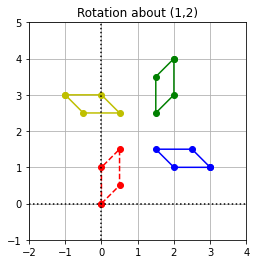

In [24]:
coords = np.array([[0,0],[0.5,0.5],[0.5,1.5],[0,1],[0,0]])
coords = coords.transpose()
x = coords[0,:]
y = coords[1,:]

# Form a matrix of coordinates with rows x, y, 1
Ones = np.ones((1,5))
coords = np.vstack((x,y,Ones))

# Define the matrix for the transfomation RSL
RSL = np.array([[0,-1,3],[1,0,1],[0,0,1]])

## Compute the transformation by matrix multiplication
coords_transformed_1 = RSL@coords
coords_transformed_2 = RSL@RSL@coords
coords_transformed_3 = RSL@RSL@RSL@coords

## Slice off the first and second rows.  These are the coords of the transformed points
x_transformed_1 = coords_transformed_1[0,:]
y_transformed_1 = coords_transformed_1[1,:]
x_transformed_2 = coords_transformed_2[0,:]
y_transformed_2 = coords_transformed_2[1,:]
x_transformed_3 = coords_transformed_3[0,:]
y_transformed_3 = coords_transformed_3[1,:]

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the points.
ax.plot(x,y,'ro')
ax.plot(x_transformed_1,y_transformed_1,'bo')
ax.plot(x_transformed_2,y_transformed_2,'go')
ax.plot(x_transformed_3,y_transformed_3,'yo')

# Connect the points by lines
ax.plot(x,y,'r',ls="--")
ax.plot(x_transformed_1,y_transformed_1,'b')
ax.plot(x_transformed_2,y_transformed_2,'g')
ax.plot(x_transformed_3,y_transformed_3,'y')

# Edit some settings 
ax.axvline(x=0,color="k",ls=":")
ax.axhline(y=0,color="k",ls=":")
ax.grid(True)
ax.axis([-2,4,-1,5])
ax.set_aspect('equal')
ax.set_title("Rotation about (1,2)");

#### Discrete Dynamical Systems

**Exercise 1:** The webpages and their links are an example of a [directed graph](Applications.ipynb) as discussed in an earlier chapter.  An adjacency matrix therefore could be used to conveniently describe the link structure among the pages.  The matrix used in the web navigation model could then be constructed from the adjacency matrix.  Write a Python function that accepts an adjacency matrix for a direct graph, and returns the matrix required for the corresponding web navigation model.  Test your function on the following adjacency matrix defined in the cell below.

In [25]:
A = np.array([[0,0,0,1,0,1,1,0,0,1],
              [0,0,1,0,0,0,1,1,0,0],
              [1,1,0,1,0,1,1,0,0,1],
              [0,1,0,0,0,0,1,0,0,1],
              [0,0,0,1,0,0,1,0,0,0],
              [1,1,0,1,0,0,1,0,0,1],
              [0,0,0,1,0,1,0,0,0,0],
              [0,1,0,1,0,1,1,0,0,1],
              [0,1,1,1,0,1,0,1,0,0],
              [1,0,1,1,0,0,1,1,0,0],
             ])

The desired matrix in our web navigation model has probability $a_{ij}$ that the browser navigates from page $j$ to page $i$ but an adjacency matrix has $a_{ij} = 1$ if page $i$ has a link to page $j$, so for simplicity's sake we first take the transpose of $A$. We then loop over each column, counting how many pages site $j$ links to (call it $k$) then changing every 1 in the $j^{\text{th}}$ column to $\frac{0.8}{k} + \frac{0.2}{n-1}$ and every 0 in the $j^{\text{th}}$ column to $\frac{0.2}{n-1}$ (where $n \times n$ is the size of our adjacency matrix).

In [26]:
def ConvertAdjacencyMatrix(A):
    '''
    ConvertAdjacencyMatrix(A)
    
    ConvertAdjacencyMatrix converts an adjacency matrix into the matrix
    required for the corresponding web navigation model. There is no error
    checking to make sure that A is a proper adjacency matrix.

    Parameters
    ----------
    A : NumPy array object of dimension nxn

    Returns
    -------
    A_transpose : NumPy array object of dimension nxn
    '''
    
    A_transpose = np.transpose(A)
    n = A.shape[0]  # n is the number of rows and columns in A

    for j in range(0,n):                             
        k = 0                           # k counts the number of 1's in column j
        for i in range(0,n):
            if (A_transpose[i][j] == 1):
                k = k + 1
        for i in range(0,n):
            if (A_transpose[i][j] == 1):
                A_transpose[i][j] = 0.8/k + 0.2/(n-1)
            elif (i != j):
                A_transpose[i][j] = 0.2/(n-1)
            
    return(A_transpose)

We will now test our function on $A$, being careful not to round the changes to $\texttt{A_transpose}$.

In [27]:
A = np.array([[0,0,0,1,0,1,1,0,0,1],
              [0,0,1,0,0,0,1,1,0,0],
              [1,1,0,1,0,1,1,0,0,1],
              [0,1,0,0,0,0,1,0,0,1],
              [0,0,0,1,0,0,1,0,0,0],
              [1,1,0,1,0,0,1,0,0,1],
              [0,0,0,1,0,1,0,0,0,0],
              [0,1,0,1,0,1,1,0,0,1],
              [0,1,1,1,0,1,0,1,0,0],
              [1,0,1,1,0,0,1,1,0,0],
             ], dtype = float)

print(np.round(ConvertAdjacencyMatrix(A),3))

[[0.    0.022 0.156 0.022 0.022 0.182 0.022 0.022 0.022 0.182]
 [0.022 0.    0.156 0.289 0.022 0.182 0.022 0.182 0.182 0.022]
 [0.022 0.289 0.    0.022 0.022 0.022 0.022 0.022 0.182 0.182]
 [0.222 0.022 0.156 0.    0.422 0.182 0.422 0.182 0.182 0.182]
 [0.022 0.022 0.022 0.022 0.    0.022 0.022 0.022 0.022 0.022]
 [0.222 0.022 0.156 0.022 0.022 0.    0.422 0.182 0.182 0.022]
 [0.222 0.289 0.156 0.289 0.422 0.182 0.    0.182 0.022 0.182]
 [0.022 0.289 0.022 0.022 0.022 0.022 0.022 0.    0.182 0.182]
 [0.022 0.022 0.022 0.022 0.022 0.022 0.022 0.022 0.    0.022]
 [0.222 0.022 0.156 0.289 0.022 0.182 0.022 0.182 0.022 0.   ]]
